In [1]:
Prepared Data loading

SyntaxError: invalid syntax (1592858116.py, line 1)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\silve\Downloads\archive (6)\SalesKaggle3.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())


print(data.info())


   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.84  
1         39          0.00

In [3]:
# Handling missing values
data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity
data.dropna(inplace=True)  # Drop any remaining NaN values

C:\Users\silve\AppData\Local\Temp\ipykernel_12120\2179082341.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity


In [4]:

# Calculate the difference between Price and LowNetPrice
data['PriceDifference'] = data['PriceReg'] - data['LowNetPrice']
# Convert ReleaseYear to Age
current_year = pd.Timestamp.now().year
data['Age'] = current_year - data['ReleaseYear']

# Dropping the specified columns, including 'LowUserPrice'
data_prepared = data.drop(columns=[
    'Order', 
    'PriceReg',
    'ReleaseYear',
    'File_Type', 
    'SKU_number', 
    'ReleaseNumber', 
    'LowUserPrice',
    'LowNetPrice',
    'MarketingType'
])

# Print the data
print(data_prepared)

# Save the prepared data to a CSV file
data_prepared.to_csv('data_prepared.csv', index=False)

        SoldFlag  SoldCount  New_Release_Flag  StrengthFactor  ItemCount  \
0            0.0        0.0                 1    6.827430e+05          8   
1            0.0        0.0                 1    1.016014e+06         39   
2            0.0        0.0                 0    3.404640e+05         34   
3            1.0        1.0                 1    3.340110e+05         20   
4            1.0        1.0                 1    1.287938e+06         28   
...          ...        ...               ...             ...        ...   
198912       0.0        0.0                 1    2.101869e+05         54   
198913       0.0        0.0                 1    4.555041e+05         65   
198914       0.0        0.0                 1    1.692746e+05         23   
198915       0.0        0.0                 1    3.775266e+05         23   
198916       0.0        0.0                 1    1.183068e+05         44   

        PriceDifference  Age  
0                 13.15    9  
1                  9.27  

In [5]:
import pandas as pd

# Load the data
data = pd.read_csv(r'C:\Users\silve\data_prepared.csv')

# Display the first few rows of the dataset
data.head()


,SoldFlag,SoldCount,New_Release_Flag,StrengthFactor,ItemCount,PriceDifference,Age
0,0.0,0.0,1,682743.0,8,13.15,9
1,0.0,0.0,1,1016014.0,39,9.27,19
2,0.0,0.0,0,340464.0,34,18.03,11
3,1.0,1.0,1,334011.0,20,16.85,18
4,1.0,1.0,1,1287938.0,28,97.96,14


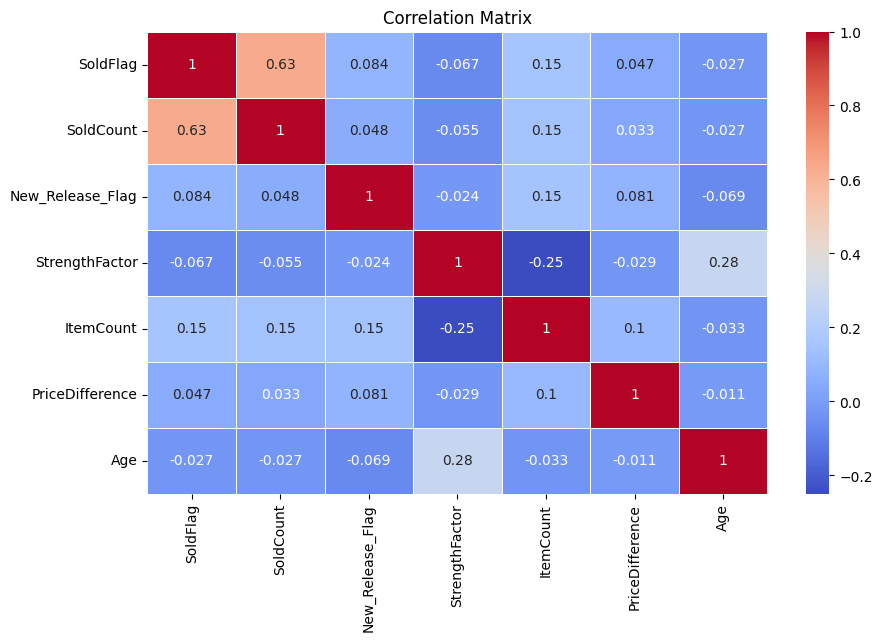

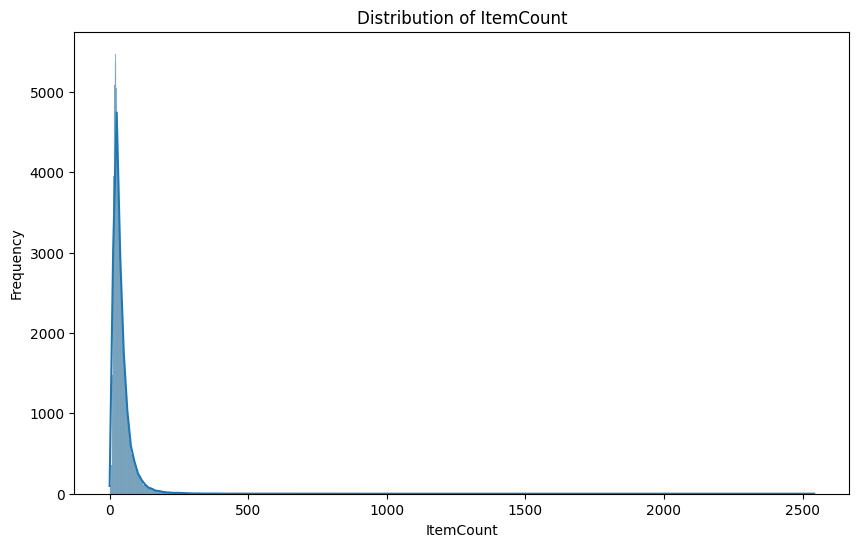

,SoldFlag,SoldCount,New_Release_Flag,StrengthFactor,ItemCount,PriceDifference,Age
count,198917.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000
mean,0.065334,0.123137,0.642248,1.117115e+06,41.426283,44.063190,17.983586
std,0.247115,0.739101,0.479340,1.522090e+06,37.541215,146.333231,9.158331
min,0.000000,0.000000,0.000000,6.275000e+00,0.000000,-18980.800000,6.000000
25%,0.000000,0.000000,0.000000,1.614188e+05,21.000000,9.000000,13.000000
50%,0.000000,0.000000,1.000000,5.822240e+05,32.000000,28.060000,17.000000
75%,0.000000,0.000000,1.000000,1.430083e+06,50.000000,69.480000,21.000000
max,1.000000,73.000000,1.000000,1.738445e+07,2542.000000,12671.480000,2024.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics
summary_stats = data.describe()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot distribution of ItemCount
plt.figure(figsize=(10, 6))
sns.histplot(data['ItemCount'], kde=True)
plt.title('Distribution of ItemCount')
plt.xlabel('ItemCount')
plt.ylabel('Frequency')
plt.show()

summary_stats


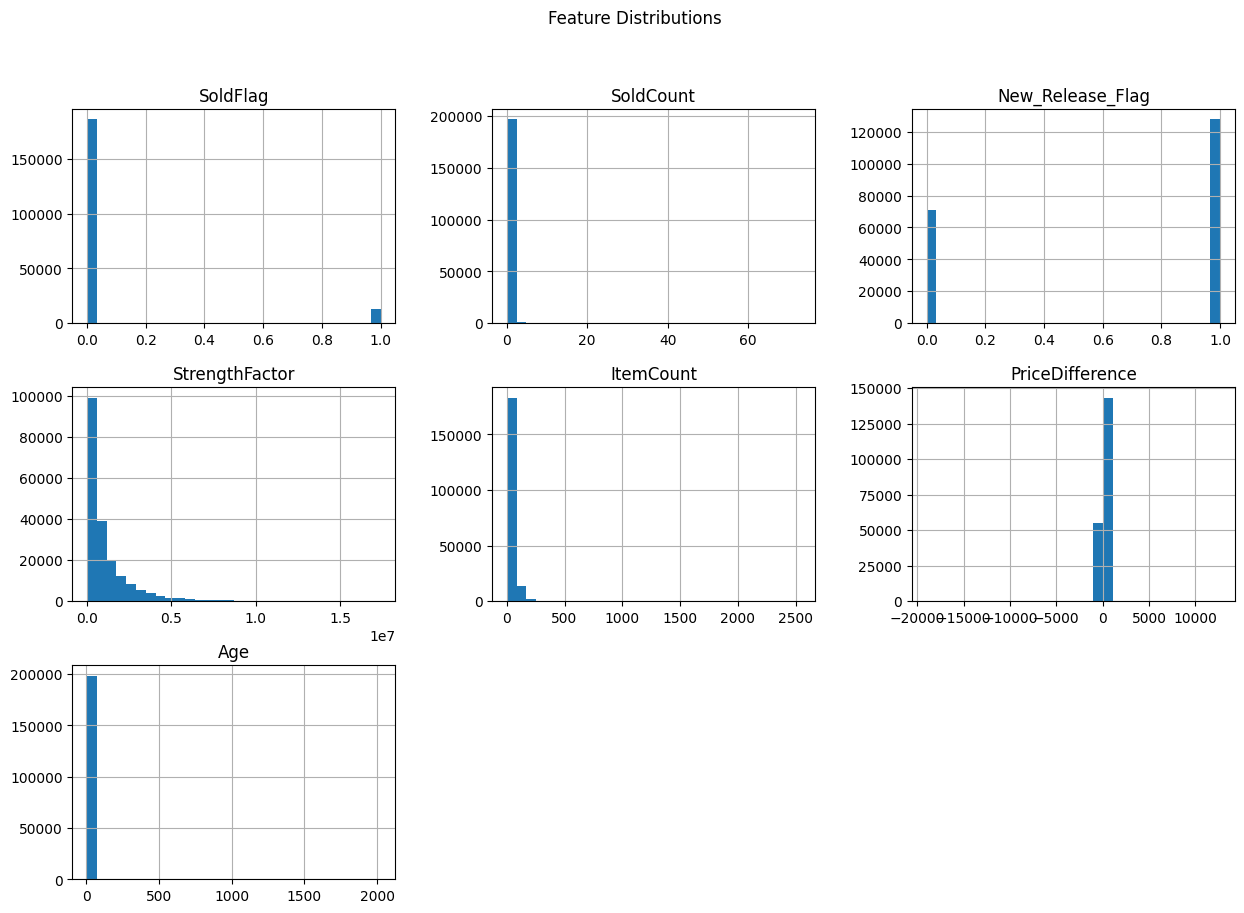

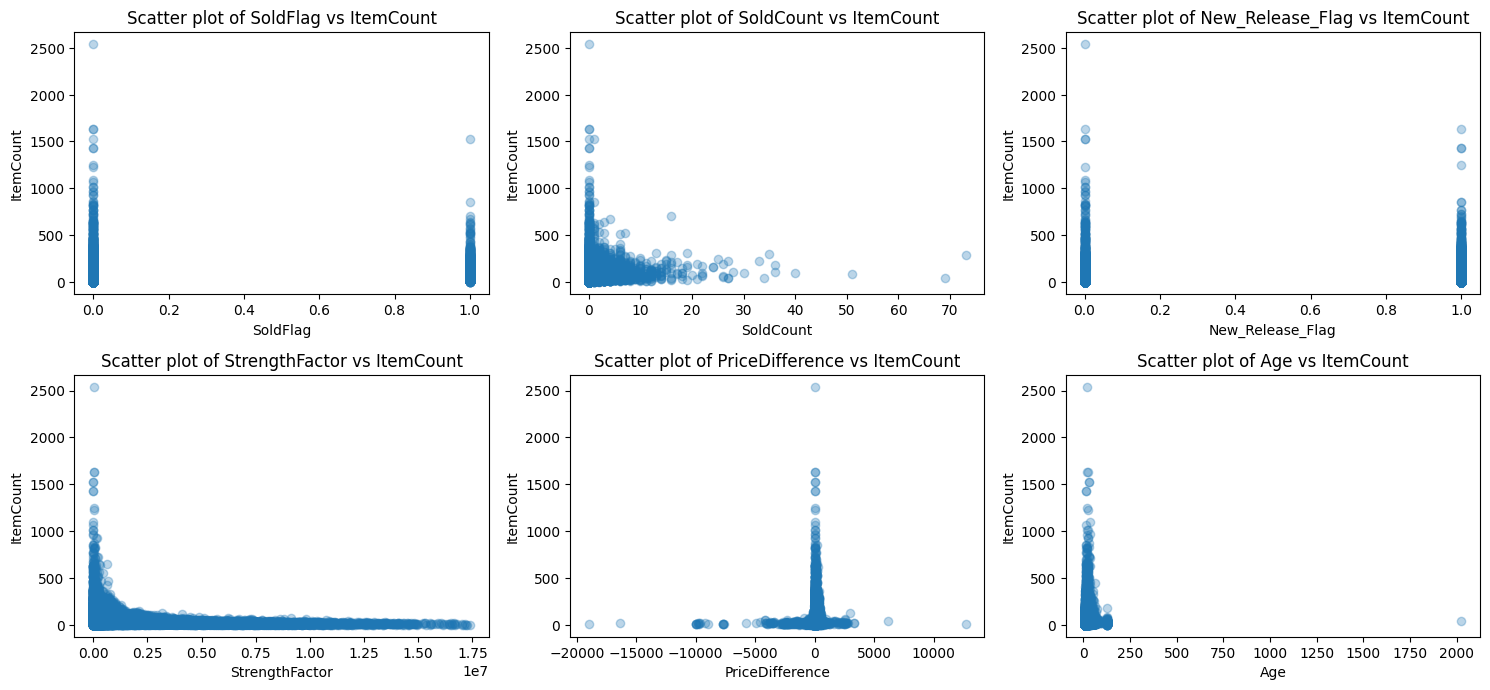

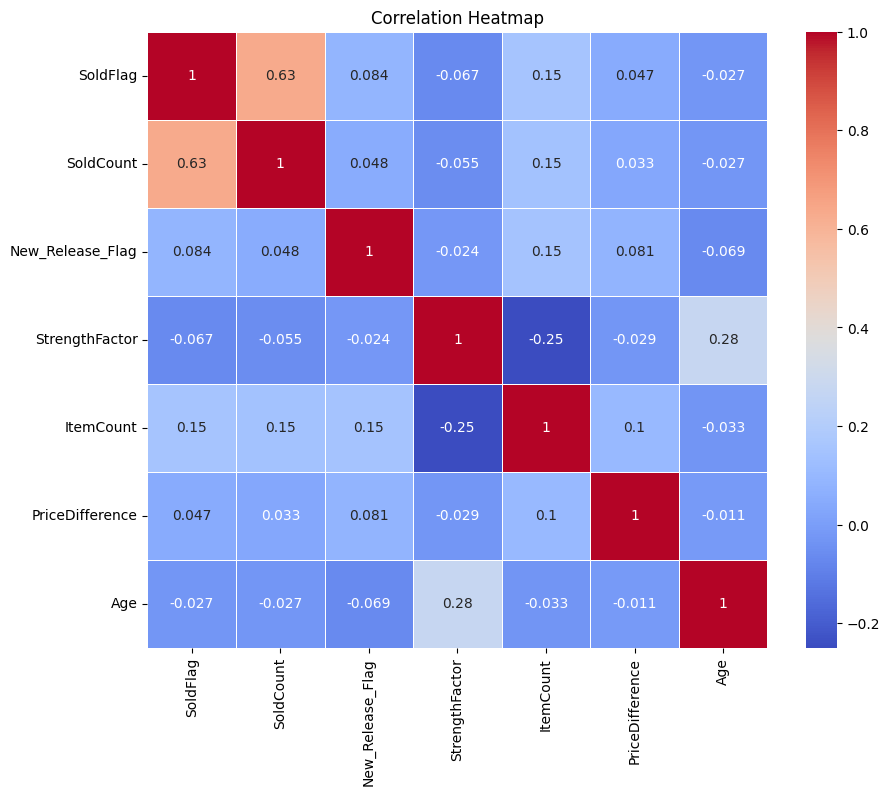

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms for each feature
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Plot scatter plots for each feature against ItemCount
features = data.columns.drop('ItemCount')
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.scatter(data[feature], data['ItemCount'], alpha=0.3)
    plt.title(f'Scatter plot of {feature} vs ItemCount')
    plt.xlabel(feature)
    plt.ylabel('ItemCount')

plt.tight_layout()
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your prepared data
data_prepared = pd.read_csv('prepared_data.csv')

# Specify the feature columns and the target column
X = data_prepared.drop(columns=['ItemCount'])  # Features
y = data_prepared['ItemCount']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Define the preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a single transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
linear regression

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...
# Initialize the results dictionary
results = {}
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize Linear Regression model
linear_regression = LinearRegression()

# Evaluate Linear Regression
linear_regression_results = evaluate_model(linear_regression, X_train, y_train, X_test, y_test)
results["Linear Regression"] = {"MAE": linear_regression_results[0], "RMSE": linear_regression_results[1], "R2": linear_regression_results[2]}

print(f"Linear Regression - MAE: {linear_regression_results[0]}, RMSE: {linear_regression_results[1]}, R2: {linear_regression_results[2]}")



Linear Regression - MAE: 20.007253960936627, RMSE: 33.54253352309847, R2: 0.12036958080849713


In [ ]:
Running all models 

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize Ridge Regression model
ridge_regression = Ridge()

# Evaluate Ridge Regression
ridge_regression_results = evaluate_model(ridge_regression, X_train, y_train, X_test, y_test)
results["Ridge Regression"] = {"MAE": ridge_regression_results[0], "RMSE": ridge_regression_results[1], "R2": ridge_regression_results[2]}

print(f"Ridge Regression - MAE: {ridge_regression_results[0]}, RMSE: {ridge_regression_results[1]}, R2: {ridge_regression_results[2]}")


Ridge Regression - MAE: 20.00874630710706, RMSE: 33.54093434026166, R2: 0.12045345380129158


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize Lasso Regression model
lasso_regression = Lasso()

# Evaluate Lasso Regression
lasso_regression_results = evaluate_model(lasso_regression, X_train, y_train, X_test, y_test)
results["Lasso Regression"] = {"MAE": lasso_regression_results[0], "RMSE": lasso_regression_results[1], "R2": lasso_regression_results[2]}

print(f"Lasso Regression - MAE: {lasso_regression_results[0]}, RMSE: {lasso_regression_results[1]}, R2: {lasso_regression_results[2]}")


Lasso Regression - MAE: 20.032464547524803, RMSE: 33.613325350218325, R2: 0.11665272645058855


In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize Decision Tree model
decision_tree = DecisionTreeRegressor()

# Evaluate Decision Tree
decision_tree_results = evaluate_model(decision_tree, X_train, y_train, X_test, y_test)
results["Decision Tree"] = {"MAE": decision_tree_results[0], "RMSE": decision_tree_results[1], "R2": decision_tree_results[2]}

print(f"Decision Tree - MAE: {decision_tree_results[0]}, RMSE: {decision_tree_results[1]}, R2: {decision_tree_results[2]}")


Decision Tree - MAE: 19.479237884576715, RMSE: 37.11031456907967, R2: -0.07670761858583619


In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize Gradient Boosting model
gradient_boosting = GradientBoostingRegressor()

# Evaluate Gradient Boosting
gradient_boosting_results = evaluate_model(gradient_boosting, X_train, y_train, X_test, y_test)
results["Gradient Boosting"] = {"MAE": gradient_boosting_results[0], "RMSE": gradient_boosting_results[1], "R2": gradient_boosting_results[2]}

print(f"Gradient Boosting - MAE: {gradient_boosting_results[0]}, RMSE: {gradient_boosting_results[1]}, R2: {gradient_boosting_results[2]}")


Gradient Boosting - MAE: 15.697914114045968, RMSE: 27.980516007084475, R2: 0.3879034194685921


In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize Random Forest model
random_forest = RandomForestRegressor()

# Evaluate Random Forest
random_forest_results = evaluate_model(random_forest, X_train, y_train, X_test, y_test)
results["Random Forest"] = {"MAE": random_forest_results[0], "RMSE": random_forest_results[1], "R2": random_forest_results[2]}

print(f"Random Forest - MAE: {random_forest_results[0]}, RMSE: {random_forest_results[1]}, R2: {random_forest_results[2]}")


Random Forest - MAE: 14.506262502034797, RMSE: 25.706686103164557, R2: 0.48334492025095177


In [25]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize XGBoost model
xgboost = xgb.XGBRegressor()

# Evaluate XGBoost
xgboost_results = evaluate_model(xgboost, X_train, y_train, X_test, y_test)
results["XGBoost"] = {"MAE": xgboost_results[0], "RMSE": xgboost_results[1], "R2": xgboost_results[2]}

print(f"XGBoost - MAE: {xgboost_results[0]}, RMSE: {xgboost_results[1]}, R2: {xgboost_results[2]}")


XGBoost - MAE: 14.917458422549245, RMSE: 26.401005124987094, R2: 0.45505911111831665


In [26]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize LightGBM model
lightgbm = lgb.LGBMRegressor()

# Evaluate LightGBM
lightgbm_results = evaluate_model(lightgbm, X_train, y_train, X_test, y_test)
results["LightGBM"] = {"MAE": lightgbm_results[0], "RMSE": lightgbm_results[1], "R2": lightgbm_results[2]}

print(f"LightGBM - MAE: {lightgbm_results[0]}, RMSE: {lightgbm_results[1]}, R2: {lightgbm_results[2]}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 159133, number of used features: 8
[LightGBM] [Info] Start training from score 41.501335
LightGBM - MAE: 14.920826006078837, RMSE: 26.405609583872174, R2: 0.4548689617631856


In [27]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# X_train, X_test, y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize CatBoost model
catboost = CatBoostRegressor(verbose=0)

# Evaluate CatBoost
catboost_results = evaluate_model(catboost, X_train, y_train, X_test, y_test)
results["CatBoost"] = {"MAE": catboost_results[0], "RMSE": catboost_results[1], "R2": catboost_results[2]}

print(f"CatBoost - MAE: {catboost_results[0]}, RMSE: {catboost_results[1]}, R2: {catboost_results[2]}")


CatBoost - MAE: 14.795640295033957, RMSE: 26.25646692781307, R2: 0.4610095272522776


In [28]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Placeholder for data
# Define X_train, X_test, y_train, y_test with actual data before running this block
# X_train, X_test = ...
# y_train, y_test = ...

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initialize CatBoost model
catboost = CatBoostRegressor(verbose=0)

# Evaluate CatBoost
catboost_results = evaluate_model(catboost, X_train, y_train, X_test, y_test)
results["CatBoost"] = {"MAE": catboost_results[0], "RMSE": catboost_results[1], "R2": catboost_results[2]}

print(f"CatBoost - MAE: {catboost_results[0]}, RMSE: {catboost_results[1]}, R2: {catboost_results[2]}")


CatBoost - MAE: 14.795640295033957, RMSE: 26.25646692781307, R2: 0.4610095272522776


In [29]:
import pandas as pd

# Aggregate results from all the models
all_results = {
    "Linear Regression": {"MAE": linear_regression_results[0], "RMSE": linear_regression_results[1], "R2": linear_regression_results[2]},
    "Ridge Regression": {"MAE": ridge_regression_results[0], "RMSE": ridge_regression_results[1], "R2": ridge_regression_results[2]},
    "Lasso Regression": {"MAE": lasso_regression_results[0], "RMSE": lasso_regression_results[1], "R2": lasso_regression_results[2]},
    "Decision Tree": {"MAE": decision_tree_results[0], "RMSE": decision_tree_results[1], "R2": decision_tree_results[2]},
    "Gradient Boosting": {"MAE": gradient_boosting_results[0], "RMSE": gradient_boosting_results[1], "R2": gradient_boosting_results[2]},
    "Random Forest": {"MAE": random_forest_results[0], "RMSE": random_forest_results[1], "R2": random_forest_results[2]},
    "XGBoost": {"MAE": xgboost_results[0], "RMSE": xgboost_results[1], "R2": xgboost_results[2]},
    "LightGBM": {"MAE": lightgbm_results[0], "RMSE": lightgbm_results[1], "R2": lightgbm_results[2]},
    "CatBoost": {"MAE": catboost_results[0], "RMSE": catboost_results[1], "R2": catboost_results[2]},
}

# Convert results to DataFrame and sort by R2 score
results_df = pd.DataFrame(all_results).T
results_df = results_df.sort_values(by='R2', ascending=False)

# Display results
print(results_df)


                         MAE       RMSE        R2
Random Forest      14.506263  25.706686  0.483345
CatBoost           14.795640  26.256467  0.461010
XGBoost            14.917458  26.401005  0.455059
LightGBM           14.920826  26.405610  0.454869
Gradient Boosting  15.697914  27.980516  0.387903
Ridge Regression   20.008746  33.540934  0.120453
Linear Regression  20.007254  33.542534  0.120370
Lasso Regression   20.032465  33.613325  0.116653
Decision Tree      19.479238  37.110315 -0.076708


In [30]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 300),  # Reduced range for quicker evaluation
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
n_iter_search = 20  # Number of parameter settings that are sampled
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_distributions, n_iter=n_iter_search, cv=3, scoring='neg_mean_absolute_error', verbose=1, random_state=42, n_jobs=-1)

# Start the timer
start_time = time.time()

# Fit the model
print("Starting hyperparameter tuning...")
random_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best estimator
best_random_forest = random_search.best_estimator_

# Evaluate on test data
y_pred = best_random_forest.predict(X_test)
print("Test MAE: ", mean_absolute_error(y_test, y_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2: ", r2_score(y_test, y_pred))

# Print the duration
print(f"Hyperparameter tuning took {duration:.2f} seconds.")


Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 289}
Test MAE:  13.99553877893337
Test RMSE:  25.11456256990059
Test R2:  0.5068718994234981
Hyperparameter tuning took 486.36 seconds.


In [31]:
import time
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform, randint
from tqdm import tqdm

# Define the parameter grid
param_distributions = {
    'iterations': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'depth': randint(4, 10),
    'l2_leaf_reg': uniform(1, 5),
    'subsample': uniform(0.6, 1.0)
}

# Initialize CatBoost model
catboost = CatBoostRegressor(verbose=0)

# Initialize RandomizedSearchCV with a progress bar
n_iter_search = 50  # Number of parameter settings that are sampled
random_search = RandomizedSearchCV(estimator=catboost, param_distributions=param_distributions, n_iter=n_iter_search, cv=3, scoring='neg_mean_absolute_error', verbose=0, random_state=42, n_jobs=-1)

# Start the timer
start_time = time.time()

# Fit the model with progress bar
random_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best estimator
best_catboost = random_search.best_estimator_

# Evaluate on test data
y_pred = best_catboost.predict(X_test)
print("Test MAE: ", mean_absolute_error(y_test, y_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2: ", r2_score(y_test, y_pred))

# Print the duration
print(f"Hyperparameter tuning took {duration:.2f} seconds.")


C:\Users\silve\Anaconda3\envs\learn-env3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
102 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\silve\Anaconda3\envs\learn-env3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\silve\Anaconda3\envs\learn-env3\lib\site-packages\catboost\core.py", line 5827, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\silve\Anaconda3\envs\le

Best parameters found:  {'depth': 9, 'iterations': 970, 'l2_leaf_reg': 1.2021679476921567, 'learning_rate': 0.15213257793715748, 'subsample': 0.7108908208118313}
Test MAE:  14.513939290928759
Test RMSE:  25.338492589212198
Test R2:  0.49803889796698875
Hyperparameter tuning took 110.55 seconds.


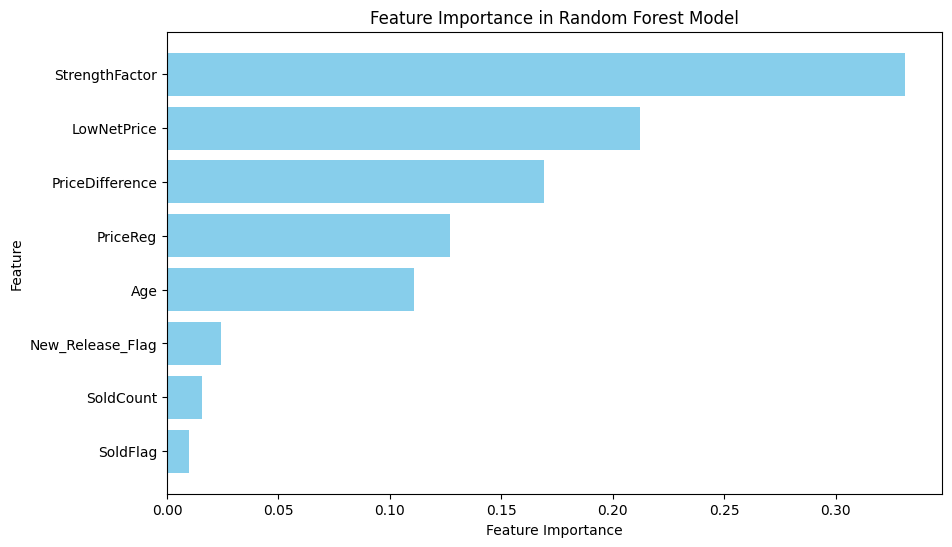

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train was converted from a DataFrame to a NumPy array, use the original column names
# feature_names is the list of feature names from the original DataFrame before preprocessing
# Ensure that feature_names is defined before this block
feature_names = X.columns.tolist()  # Replace X with your original DataFrame before preprocessing

# Extract feature importances from the best Random Forest model
feature_importances = best_random_forest.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


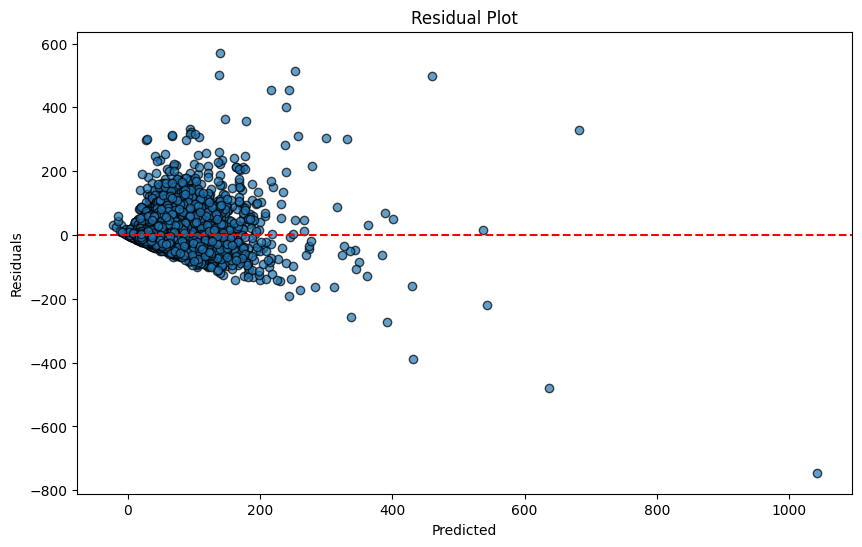

In [35]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
